# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lab 7: Visiualization

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai<br/>
**Lab Team**: Marios Mattheakis, Hayden Joy, Chris Gumb, and Eleni Kaxiras<br/>
**Authors**: Chris Gumb
<hr style='height:2px'>

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("http://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Contents
* Visualization [30 minutes]
    * Introduction [2]
    * A Visual Guessing Game [5]
    * Colors for Categories [5]
    * Colors for Quantities [5]
    * "It Doesn't Mean You Should Just Because You Can" [10]
    * Visualization Best Practices [3]
* Exercise: Exploring the Tips Dataset [10-15 minutes]
* Common Issues (with a focus on visualization) [30 minutes]
    * [Diabetes] Cross Validation Plot [5]
    * [Diabetes] Prediction Plot [5]
    * [Wine] Comparing Distributions [5]
    * [Wine] Bootstrap Confidence Intervals [10]
    * [Wine] PCA Redux [5]

In this lab we'll discuss some general visualization principles and best practices.\
We'll then move on to examine some common issues students have been having with a special focus on the visualization components.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import datasets

## Visualization 👀

<div>
    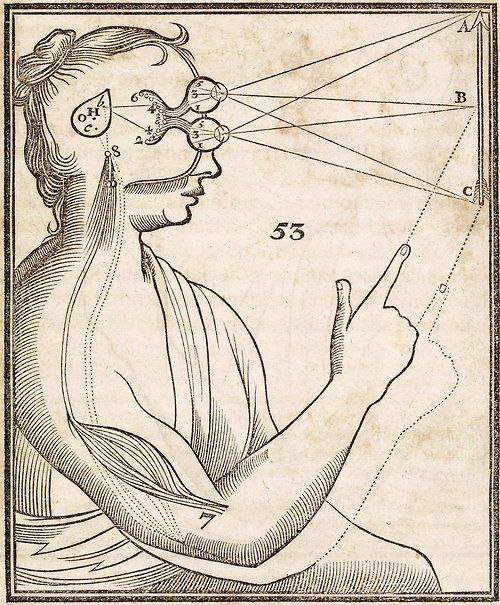
</div>

Humans are visual creatures. But in a strong sense _we see with our brains, not with our eyes_.\
Over 50% the cortex is implicated in the processing of visual information[[1]](https://www.rochester.edu/pr/Review/V74N4/0402_brainscience.html).\
Insights from [cognitive science](https://en.wikipedia.org/wiki/Cognitive_science) and [psychophysics](https://en.wikipedia.org/wiki/Psychophysics) into how visual stimuli are processed by the brain and turned into perceptions should be used to inform our visualization decisions.

Let's play a little guessing game to test and verify some of these insights.

## Visual Guessing Game 🎲

We'll look at two quantitative values where the second is some multiple of the first.\
The possible multiples are: [2, 2.5, 3, 3.5, 4, 4.5, 5]\
The rub is that **these quantities will be encoded by different visual properties**.

The quantities will be randomly generated. Cast your vote for each section on the [Lab 7 Ed survey](https://edstem.org/us/courses/9045/lessons/24101/slides/138338).\
**Be sure you are voting on the images being presented to the entire class! Any ones you create by running the cells in your own notebook will be different.**

In [3]:
def rand_scaler():
    '''
    Return a random number between 2 and 5 in steps of 0.5
    '''
    return np.random.choice(np.arange(2,5.5,0.5)) 

def test_answer(answer, scaler):
    '''
    Compare guessed scaling factor to the truth and report results
    '''
    if answer == scaler:
        print(f'Correct! {scaler:g}x 🏆')
    else:
        print(f'Oops! The correct answer is: {scaler:g}x 😵')

In [4]:
# helper functions for tidying up our plots
def hide_spines(ax, ticks=False):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
def hide_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    
def hide_spines_n_ticks(ax):
    hide_spines(ax)
    hide_ticks(ax)

def label_choices(axs):
    fontdict = {'size': 20, 'weight': 'bold'}
    axs[0].set_xlabel('A', fontdict=fontdict)
    axs[1].set_xlabel('B', fontdict=fontdict)

**Length**

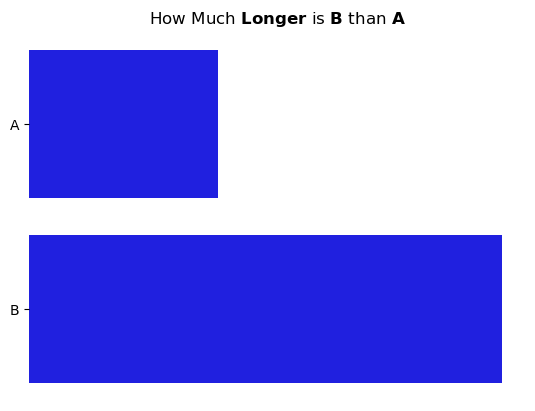

In [5]:
def guess_length():
    scaler = rand_scaler()
    ax = sns.barplot(x=[1,scaler], y=['A','B'], color='b', orient='h')
    ax.set_title(r'How Much $\bf{Longer}$ is $\bf{B}$ than $\bf{A}$')
    ax.set(xticks=[])
    hide_spines(ax)
    return scaler

scaler = guess_length()

In [7]:
# choices are 2, 2.5, 3, 3.5, 4, 4.5, or 5
ANSWER_1 = 2.5

In [8]:
test_answer(ANSWER_1, scaler)

Correct! 2.5x 🏆


**Slope / Angle**

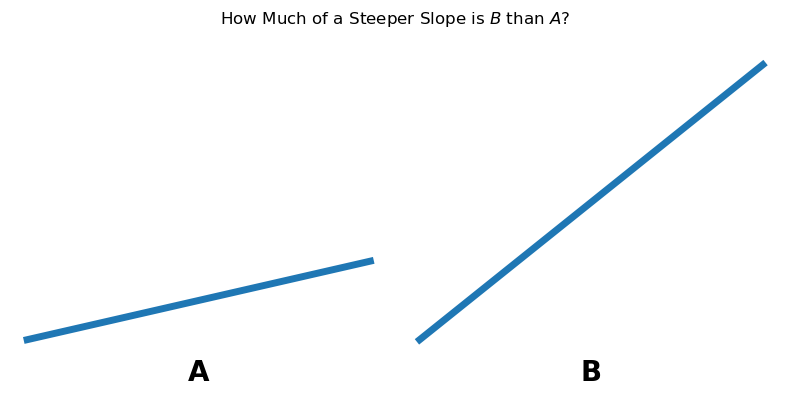

In [9]:
def guess_slope():
    fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
    x_lin = np.linspace(0,10,1000)
    m1 = np.random.uniform(0.25,1)
    scaler = rand_scaler()
    m2 = scaler*m1
    axs[0].plot(x_lin, m1*x_lin, lw=5)
    axs[1].plot(x_lin, m2*x_lin, lw=5)
    label_choices(axs)
    for ax in axs:
        hide_spines_n_ticks(ax)
    fig.suptitle(r'How Much of a Steeper Slope is $B$ than $A$?');
    plt.tight_layout()
    return scaler

scaler = guess_slope()

In [12]:
ANSWER_2 = 3.5

In [13]:
test_answer(ANSWER_2, scaler)

Correct! 3.5x 🏆


**Area**

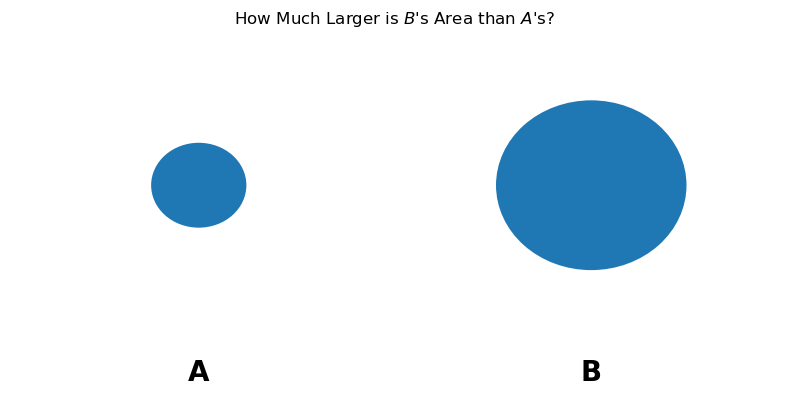

In [14]:
def guess_area():
    fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
    plt.axis([0, 10, 0, 10])
    a1 = 5
    scaler = rand_scaler()
    a2 = scaler * a1
    c1 = plt.Circle((5, 5), radius=np.sqrt(a1/np.pi))
    c2 = plt.Circle((5, 5), radius=np.sqrt(a2/np.pi))
    axs[0].add_artist(c1)
    axs[1].add_artist(c2)
    label_choices(axs)
    for ax in axs:
        hide_spines_n_ticks(ax)
    plt.tight_layout()
    fig.suptitle(r"How Much Larger is $B$'s Area than $A$'s?")
    return scaler
    
scaler = guess_area()

In [17]:
ANSWER_3 = 4

In [18]:
test_answer(ANSWER_3, scaler)

Correct! 4x 🏆


**Shading**

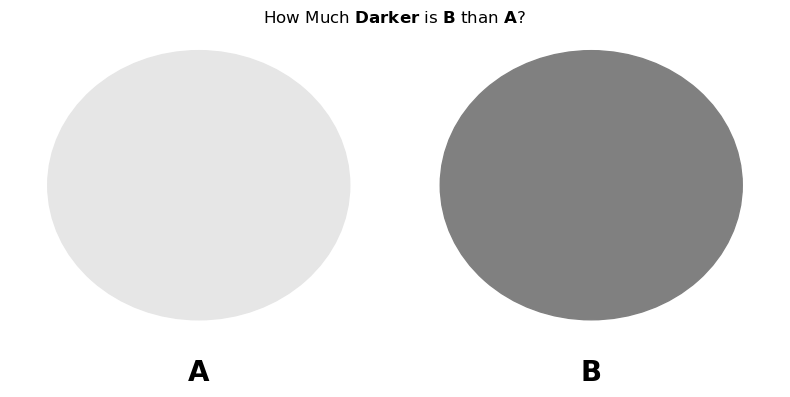

In [19]:
def guess_darkness():
    fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
    plt.axis([0, 10, 0, 10])
    scaler = rand_scaler()
    darkness = 0.1
    c1 = plt.Circle((5, 5), radius=4, color=str(1-darkness))
    c2 = plt.Circle((5, 5), radius=4, color=str(1-scaler*darkness))
    axs[0].add_artist(c1)
    axs[1].add_artist(c2)
    label_choices(axs)
    for ax in axs:
        hide_spines_n_ticks(ax)
    plt.tight_layout()
    fig.suptitle(r"How Much $\bf{Darker}$ is $\bf{B}$ than $\bf{A}$?")
    return scaler

scaler = guess_darkness()

In [22]:
ANSWER_3 = 5

In [23]:
test_answer(ANSWER_3, scaler)

Correct! 5x 🏆


You man have seen a dramatic example of this kind of difficulty in images like this one:

<div>
    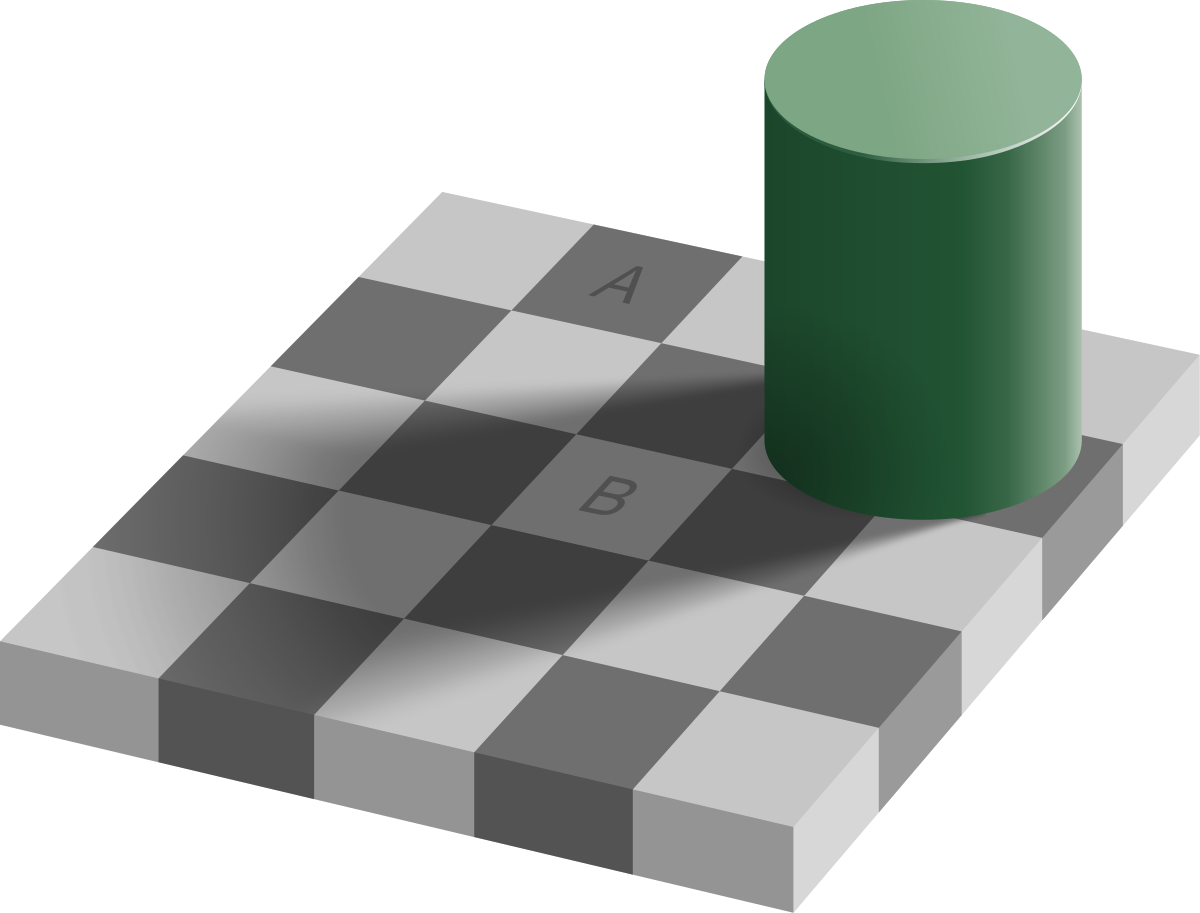
</div>

How much darker is A than B here? If you have any doubts, you can use a [color picker](https://chrome.google.com/webstore/detail/colorpick-eyedropper/ohcpnigalekghcmgcdcenkpelffpdolg) to checker.

**Color**

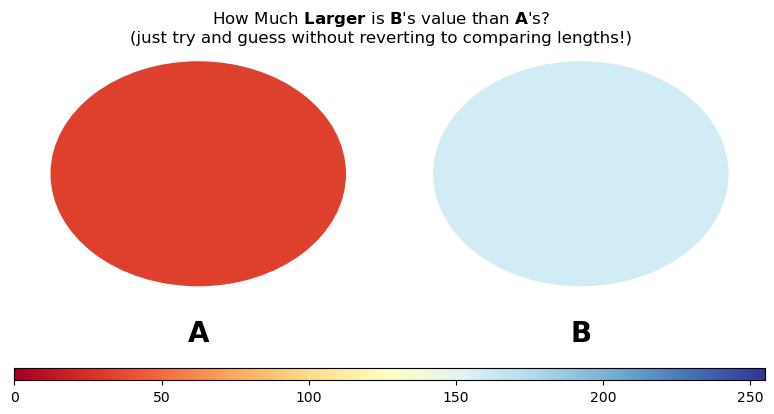

In [24]:
def guess_hue():
    fig = plt.figure(constrained_layout=False, figsize=(8, 4))
    spec = fig.add_gridspec(6, 2)
    ax1 = fig.add_subplot(spec[:5, 0])
    ax2 = fig.add_subplot(spec[:5, 1])
    ax3 = fig.add_subplot(spec[5, :])
    for ax in [ax1, ax2]:
        hide_spines_n_ticks(ax)
    ax1.axis([0, 10, 0, 10])
    ax2.axis([0, 10, 0, 10])
    ax3.axis([0, 255, 0, 1])
    scaler = rand_scaler()
    cm = matplotlib.cm.RdYlBu
    c = np.random.uniform(0,50/255)
    c1 = plt.Circle((5, 5), radius=4, color=cm(c))
    c2 = plt.Circle((5, 5), radius=4, color=cm(scaler*c))
    ax1.add_artist(c1)
    ax2.add_artist(c2)
    label_choices([ax1, ax2])
    plt.tight_layout()
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax3.imshow(gradient, aspect='auto', cmap=plt.get_cmap('RdYlBu'))
    ax3.set_yticks([])

    fig.suptitle(r"How Much $\bf{Larger}$ is $\bf{B}$'s value than $\bf{A}$'s?"+\
                 "\n(just try and guess without reverting to comparing lengths!)", y=1.025)
    return scaler

scaler = guess_hue()

In [25]:
ANSWER_4 = 3.5

In [26]:
test_answer(ANSWER_4, scaler)

Oops! The correct answer is: 5x 😵


**Take Away**\
Encode your information using those visual properties most efficiently processed and compared by the human visual system.

<div>
    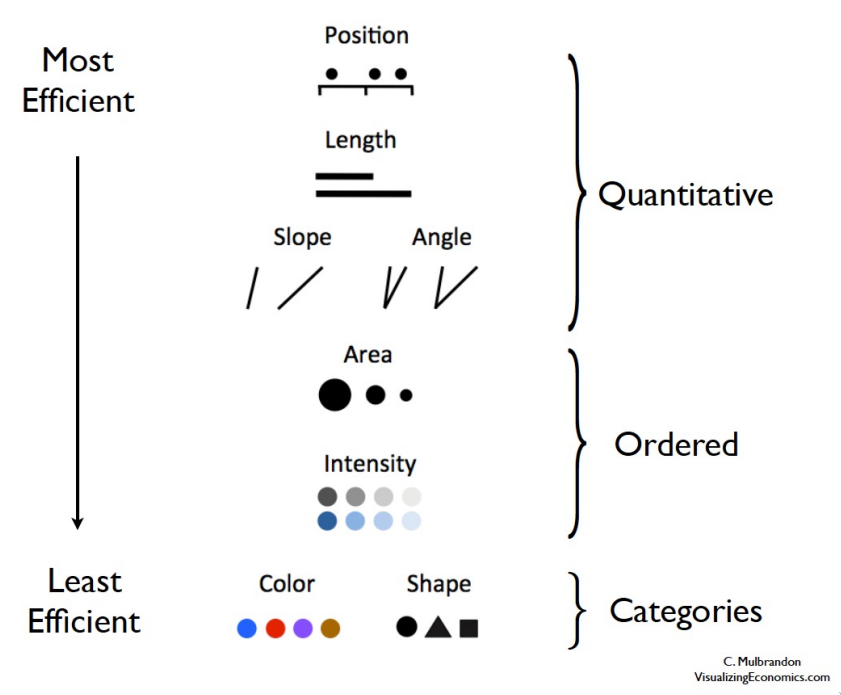
    </div>

## Colors for Categories
As a general rule, do not use more than 5-8 colors at once.\
Combining each color marker with a _unique_ shape can help.

<div>
    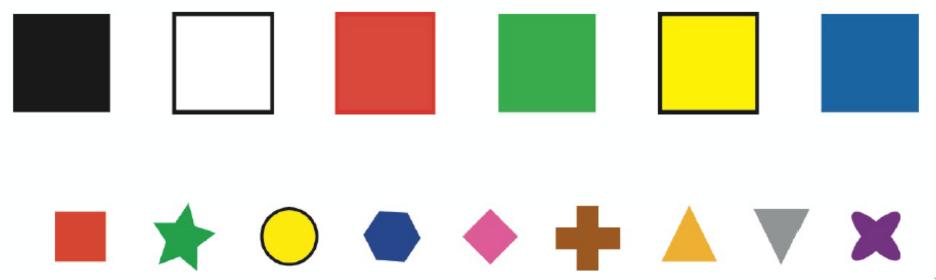
</div>

To explore this topic of colors for categories, well use the `car_crashes` dataset in `seaborn` because it has a categorical variable that takes on a large number of values. Namely, state abbreviation (`abbrev`).

This dataset was used by [FiveThirtyEight](https://fivethirtyeight.com/) for their article, [Dear Mona, Which State Has The Worst Drivers?](https://fivethirtyeight.com/features/which-state-has-the-worst-drivers/) You can find more info on the various features in the dataset on [Kaggle](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset).

In [27]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


First, a quick plot of the total number of drivers involved in fatal car crashes per billion miles driven by state.\
(We'll keep it sorted by state name so it's easier to find a specific state)

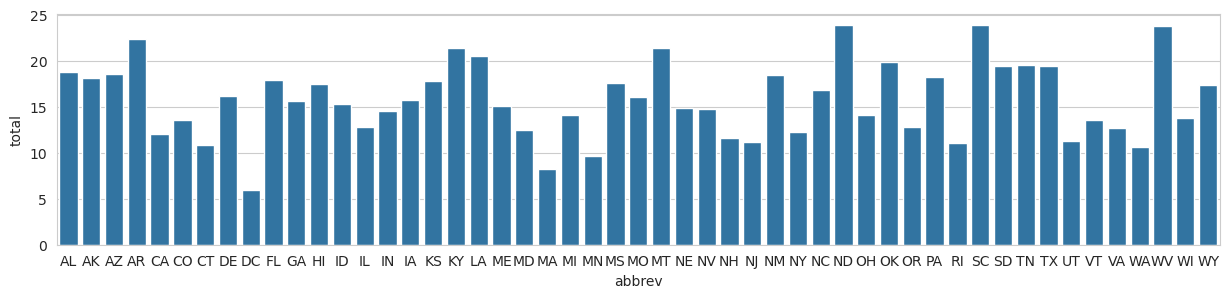

In [28]:
plt.figure(figsize=(15,3))
with sns.axes_style('whitegrid'):
    sns.barplot(data=car_crashes, x='abbrev', y='total');

Why the rainbow colors?🌈\
This is a rather annoying default behaviour in `seaborn`. There are far too many colors to be able to identify a state from the color alone. And besides, we are already encoding state with position on the $x$-axis! The rainbow colors may be pleasing to the eye, but they are simply a distraction.

This is an important principle of visualization: **be parsimonious.** If you are adding something to a plot that doesn't directly contribute to communicating your ideas then you are blunting the effect of your visualization.

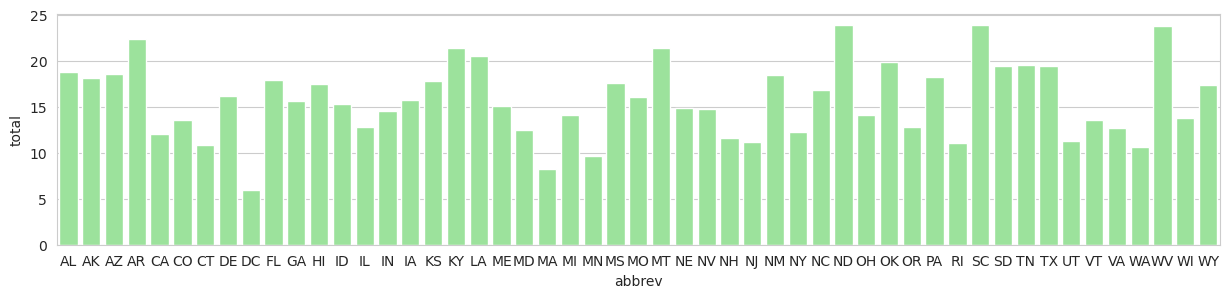

In [29]:
plt.figure(figsize=(15,3))
with sns.axes_style('whitegrid'):
    sns.barplot(data=car_crashes, x='abbrev', y='total', color='lightgreen');

That's a little less distracting, wouldn't you say?

In the first bar plot above, color isn't doing any work for us as **position** is already encoding the state. Let's look at some **scatter plots** below where we explore the relationship between:
* % drivers involved in fatal car crashes who were `speeding`
* % drivers involved in fatal car crashes who were under the influence of `alcohol`
* the state in which the crash occurred

These scatter plots will give us a change to put color (and shape) to work for us encoding state because the $x$ and $y$ position will be used to encode `speeding` and `alcohol` respectively.\
But with so many states, we should probably limit our scope of investigation. So we'll look at the 12 most densly populated states (and Washington D.C.).

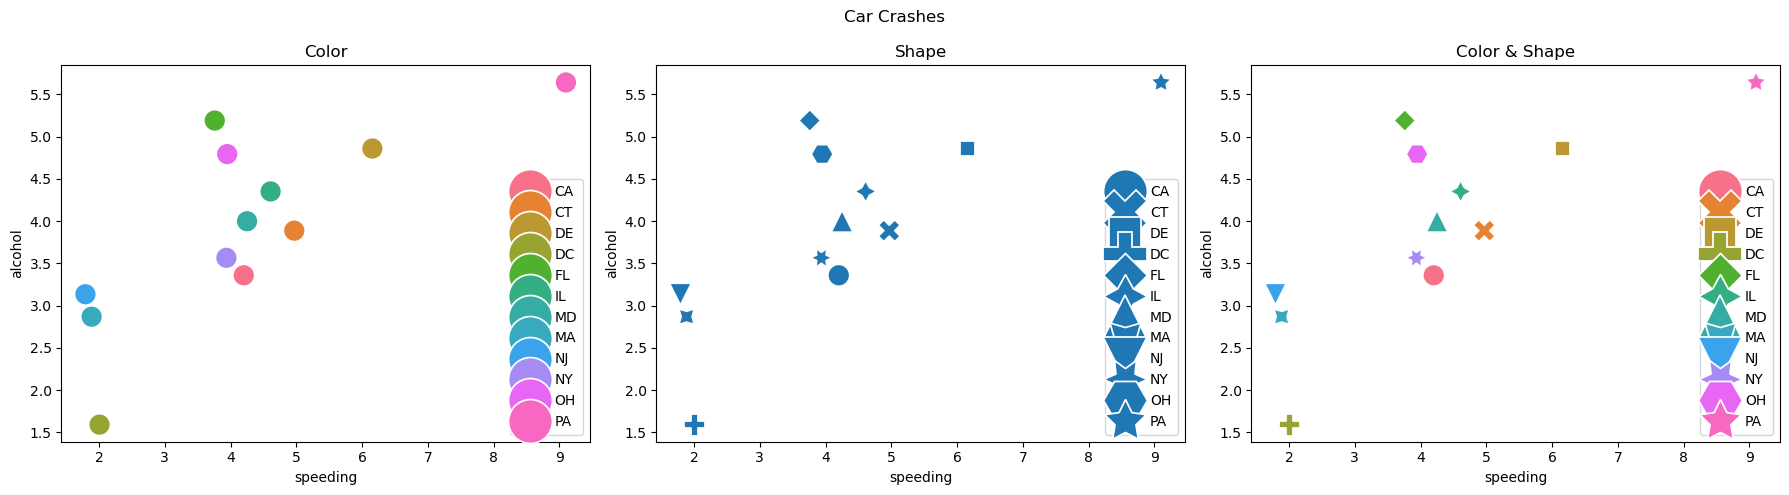

In [30]:
dozen_most_dense = ['DC','NJ','MA','CT','MD','DE','NY','FL','PA','OH','CA','IL']
mask = car_crashes.abbrev.isin(dozen_most_dense)

fig, axs = plt.subplots(1,3, figsize=(18,5))
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', hue='abbrev', s=250, ax=axs[0]).set_title('Color')
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', style='abbrev', s=250, ax=axs[1]).set_title('Shape')
sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', hue='abbrev', style='abbrev', s=250, ax=axs[2]).set_title('Color & Shape')
for ax in axs:
    ax.legend(markerscale=2)
plt.suptitle('Car Crashes')
plt.tight_layout();

We can bend our rule about each property of the image encoding one and only one type of information a little here. When we have so many categories, it is hard to distinguish on color alone (notice how similar IL, MD, and MA are). Shape is always an option for encoding categories, but it doesn't "jump out" at us like color does. By combinging the two we are able to make a noticeable improvement in the readability of our scatter plot.

But 12 categories is still really pushing it. You have to do a lot of back and forth consulting of the legend. If we restrict our investigaton to New England we see out result is much easier to take in at a glance.

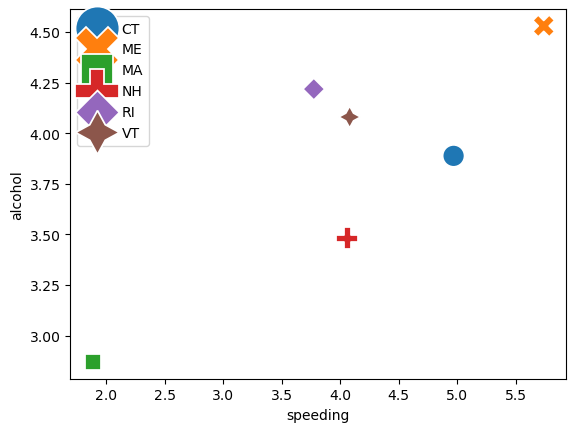

In [31]:
new_england = ['MA','NH','ME','CT','VT','RI']
mask = car_crashes.abbrev.isin(new_england)

sns.scatterplot(data=car_crashes[mask], x='speeding', y='alcohol', hue='abbrev', style='abbrev', s=250);
plt.legend(markerscale=2);

Here there is very little ambiguity as to which category is which, even with 6 different values.

## Colors for Quantities

Color can also be used to encode numerical values, continuous or discrete.\
This works best when the viewer doesn't need to compute the exact differences between values, but just get a sense of roughly where they stand relative to one another.

The [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is one of the most popular ways of using color to encode continuous (and sometimes discrete) quantities.

Here we use the **flights** as our example. ✈️

In [32]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


We'll look at how the number of flights over time using different `matplotlib` **colormaps**.

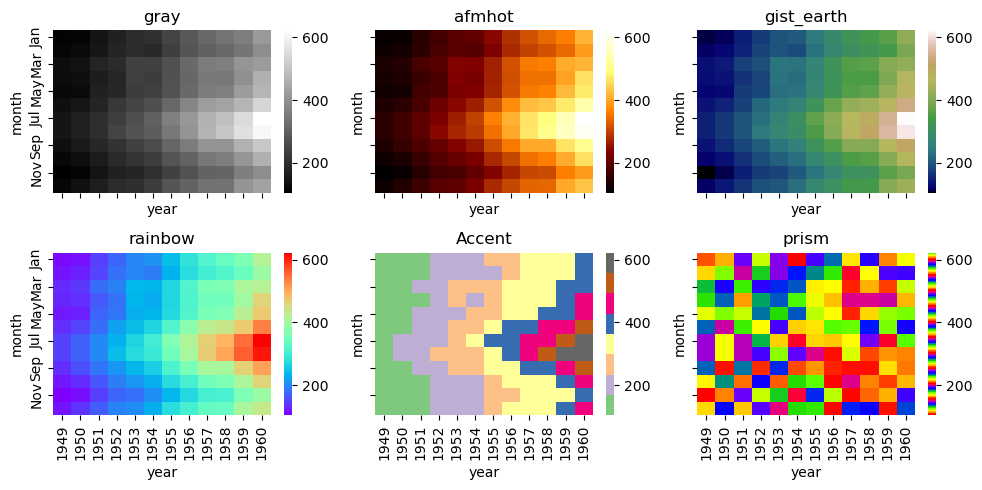

In [34]:
flights = flights.pivot(index="month", columns="year", values="passengers")

fig, axs = plt.subplots(2,3, figsize=(10, 5), sharex=True, sharey=True)

all_cmaps = list(matplotlib.cm.__dict__['datad'].keys())

FEELING_LUCKY = False
if FEELING_LUCKY:
    cmaps = np.random.choice(all_cmaps, size=np.prod(axs.shape), replace=False)
else:
    cmaps = ['gray', 'afmhot', 'gist_earth', 'rainbow', 'Accent', 'prism']

for ax, cmap in zip(axs.ravel(), cmaps):
    sns.heatmap(flights, cmap=cmap, ax=ax).set(title=cmap)
plt.tight_layout()

We can see the number of flights have been increasing each year with the bulk centered around July and August.\
Of course, not all the colormaps above are suitable for continuoys values. You can never go wrong with **gray** scale. The color gradiant on **afmhot** and **gist_earth** are interpretable with the latter perhaps veering into aesthetics-over-information territory.

**Rainbow** really should never be used for this purpose. **Accent** maybe be useful for discrete values, but we lose a lot of information here on our continuous data. And the strange **prisim** colormap, with its repeating patterm is not appropriate here.

You can see a random set of colormaps by setting `FEELING_LUCKY` to `True` and re-running the cell.

`matplotlib`'s documentation has a [colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) and a helpful page on [choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html), but exploring them ourselves within a Jupyter notebook is very easy. You can simply use tab autocomplete after `matplotlib.cm` to see all of your options.

Calling `display()` on a colormap object will show us a nice color gradiant bar!\
In fact, we don't even have to explicitly call `display()` on the object. The return value of the last line of any cell is displayed by default.\
_(This is also why you sometimes get pesky text above your plots. You can surpress this output by appending `;` to the last line of your cell)_

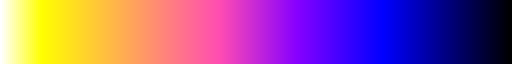

In [35]:
matplotlib.cm.gnuplot2_r

You can also do something similar with `seaborn`, though it requires you to know the name of the colormap (no tab autocomplete for exploring).

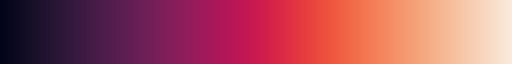

In [36]:
sns.color_palette("rocket", as_cmap=True)

The same principles regarding colormaps for quantitative values hold when plotting density functions with something like  [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [37]:
# generate some data
xs = np.random.uniform(size=100)
ys = np.random.uniform(size=100)

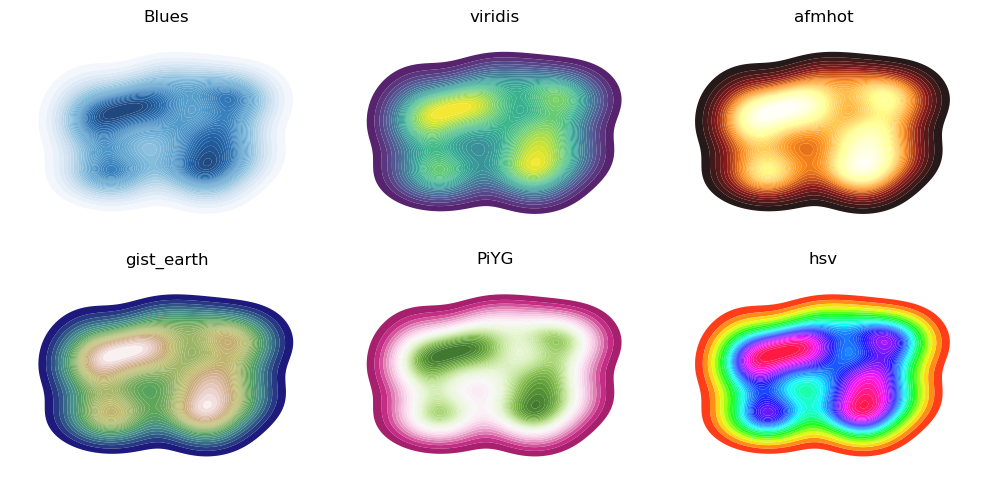

In [39]:
fig, axs = plt.subplots(2,3, figsize=(10, 5), sharex=True, sharey=True)

FEELING_LUCKY = False
if FEELING_LUCKY:
    cmaps = np.random.choice(all_cmaps, size=np.prod(axs.shape), replace=False)
else:
    cmaps = ['Blues', 'viridis', 'afmhot', 'gist_earth', 'PiYG', 'hsv']

for ax, cmap in zip(axs.ravel(), cmaps):
    sns.kdeplot(x=xs, y=ys, ax=ax,
                cmap=cmap,
                fill=True,
                thresh=0.025,
                antialiased=True,
                alpha=0.9,
                n_levels=40).set(title=cmap)
    sns.despine(left=True, bottom=True)
    hide_ticks(ax)
plt.tight_layout()

**Color-blindness**\
[According to the National Institutes of Health](https://ghr.nlm.nih.gov/condition/color-vision-deficiency#statistics), around 1 in 12 males and 1 in 200 females have some form of color vision deficiency.
* Don't use red and green as contrasting colors (this is the most common form of color-blindness)
* Seek out colormaps and palletes designed to be color-blind friendly
* View your visualizations under color-blindness simulations

Resources:
* [Color-blind Friendly Diagrams](https://yoshke.org/blog/essays/2020/07/colorblind-friendly-diagrams/) (short article)
* [CBcolors.py](https://gist.github.com/thriveth/8560036#file-cbcolors-py) (just one color-blind friendly pallette for plotting)
* [Coblis - Color Blindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) (upload your own images and simulate various color vision deficiencies)

## It Doesn't Mean You Should Just Because You Can 🐧❗

Often, our first impuse is to represent _as much information as possible_ in our visualization. We spend a lot of time coming up with clever ways to encode each feature in the dataset into a single plot.

But this is counterproductive. We want to draw attention to some interesting aspect of the data: a strong relationship, an unexpected patter, etc. These important insights can be overlooked if there is too much going on in a visualization.

Let's look at an example using `seaborn`'s penguins dataset (a worthy successor to the connonical iris dataset.)

In [40]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We have 3 species of penguins living across 3 different islands. There are measurements of bill length, bill depth, flipper length, and body mass. We also have categorcial variable for each penguin's sex giving us a total of 7 features.

Imagine your colleague were to present you with the plot below.

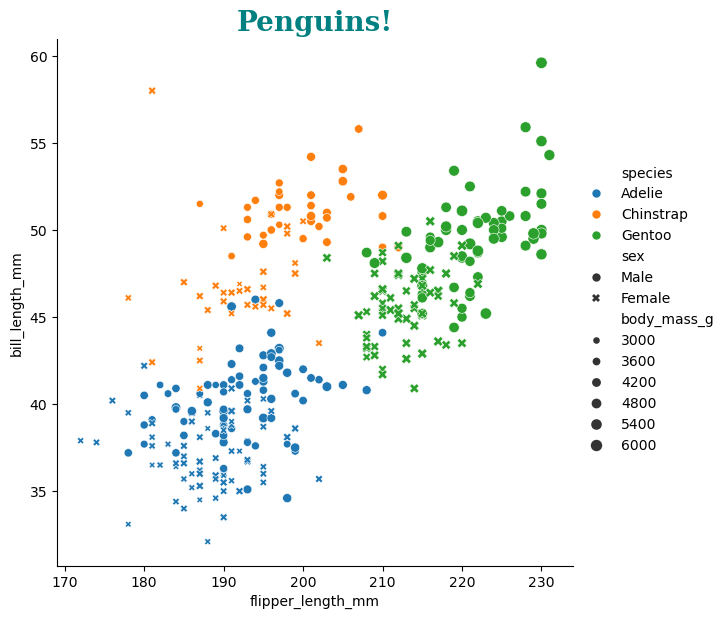

In [41]:
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            hue='species', style='sex', size='body_mass_g', height=6);
plt.title('Penguins!', fontdict={'color': 'teal', 'size': 20, 'weight': 'bold', 'family': 'serif'});

Here they've managed to encode `species`, `bill_length_mm`, `flipper_length_mm`, `body_mass_g`, and `sex` all in a single `seaborn` call. That's 5 of our original 7 predictors. And they assure you they're working on a way to encode `bill_depth_mm` with a marker's alpha value and encode `island` by giving each marker a different border color.

But was it really worth it? We need to ask ourselves, "what am I trying to communicate with this plot?"\
If we don't have a clear answer then that is a sign to re-evaluate our current approach.

How about this next example using the **exercise** dataset? 🏃🚶🧘

In [42]:
exercise = sns.load_dataset('exercise').drop('Unnamed: 0', axis=1)
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Here we have the pulse measurements from individuals on either a 'low fat' or 'no fat' diet as they engage in sitting, walking, or running for different periods of time. Once again, your ambitious colleague boasts they have captured, "all the information in a single visualization," and presents you with the plot below.

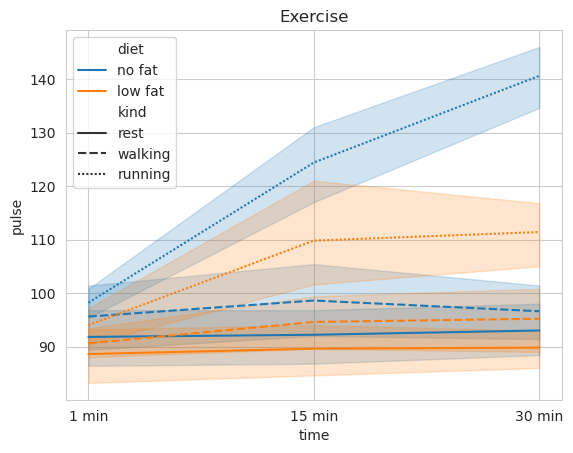

In [43]:
with sns.axes_style('whitegrid'):
    sns.lineplot(data=exercise, x='time', y='pulse', hue='diet', style='kind', estimator='mean')\
    .set_title('Exercise')

Yikes! 🤯\
While it's true we've managed to cram pretty much all the information from the dataframe into our plot, the result is a mess. And the grid lines here only make things more cluttered.

One thing would could try is splitting up the information into multiple plots so as not to overwhelm the viewer.

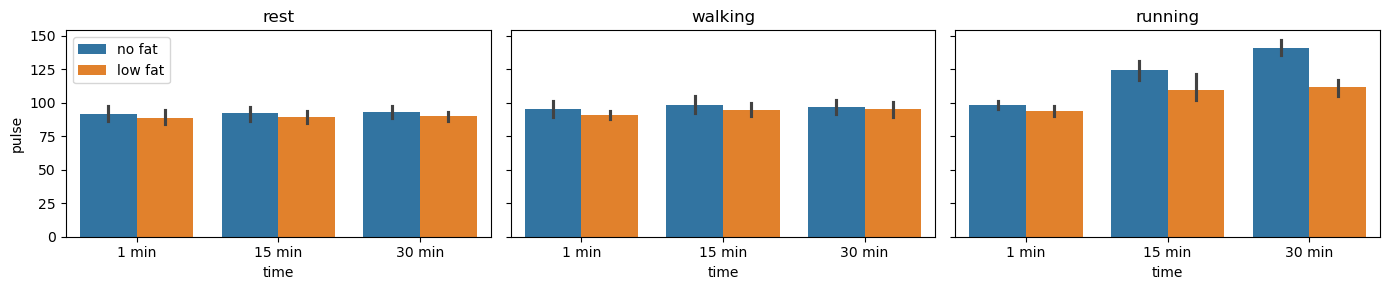

In [44]:
fig, axs = plt.subplots(1,3, figsize=(14,3), sharey=True)
for i, kind in enumerate(exercise.kind.unique()):
    mask = exercise.kind == kind
    sns.barplot(data=exercise[mask], x='time', y='pulse', hue='diet', ax=axs[i]).set_title(kind)
axs[0].legend(loc='upper left')
axs[1].get_legend().remove()
axs[2].get_legend().remove()
plt.tight_layout()

Ok, we've split up the different types of exercises. But what is the viewer really supposed to take away from this set of plots? We are still trying to do everything at one. We'd do well to focus in where we think the real story is.\

There is very little difference between the diet groups when resting or walking. Let's instead focus on running.

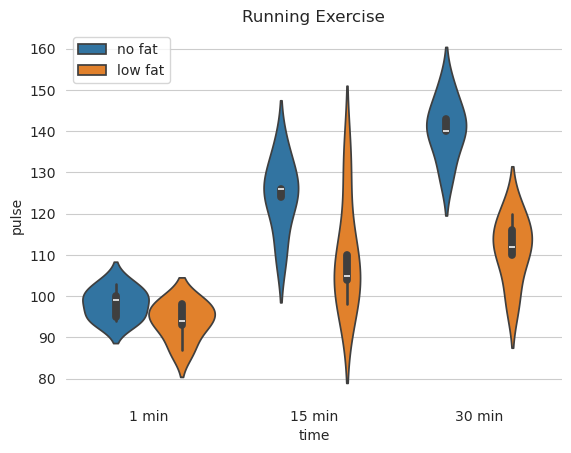

In [45]:
mask = exercise.kind == 'running'
with sns.axes_style('whitegrid'):
    ax= sns.violinplot(data=exercise[mask], x='time', y='pulse', hue='diet')
    ax.legend(loc='upper left');
    ax.set_title('Running Exercise');
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

By zooming in, not only have we reduced the cognitive load on the viewer by reducing the number of components they need to process, but we are also able to see more granular information about the segment of the data we are interested in. Using the violin plots here allows us to consider the distributions more easily than with the bar plots which just showed us the means and tiny standard deviation bars. 

Here's one curious fact that reveals itself in this new visualization: at 15 minutes, the 'low fat' group still has individuals will pulses as high as those in the 'no fat' group (some even higher), topping off at just over 150. _But_ after 30 minutes, there are _no_ 'low fat' runners with pulse much greater about 130. By contrast, the 'no fat' group's distribution reaches new heights at the 30 minute mark. Perhaps the 'low fat' runners are better able to acclimate to the strain of running after a sufficient amount of time and their cardiovascular system doesn't have to work quite as hard.

## Visualization Best Practices 🥇

* Reduce 'ink'-to-information ratio
* Follow the heirarchy of visual efficiency (MOST position -> length -> angle -> area -> intensity -> color LEAST)
* Ask, "what information is this property of the plot encoding?"
* Don't sacrifice your ability to communicate insights for eye-candy!
* Ask, "what insight am I trying to communicate with this plot?"
* Use accessible colormaps and pallettes
* Don't try to say everything in a single plot
* Often less really is more
* Just say no to rainbow colormaps and pie charts 🚫🌈 🚫🥧

**When do I use `seaborn` rather than `matplotlib`?**

`seaborn` is most useful when your data is already in a DataFrame. This allows variables to be selected using their column names. Simply pass the df as the `data` argument to the `seaborn` plotting method and pass column names for the other arguments like `x`, `y`, `hue`, etc. The method calls are very readable and you get axis labels and legends 'for free.'

`matplotlib` is best when ploting `numpy` ndarrays. Here you there are no existing column names for `seaborn` to take advantage of. This is why you see `matplotlib` used in the PCA examples below: PCA's `transform` method and `explained_variance_ratio_` attribute return `numpy` ndarrays, not a DataFrames.

Resources:
* [Seaborn Aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

<div class="alert alert-success">
    <strong>🏋🏻‍♂️ TEAM ACTIVITY:</strong> Explore the Tips Dataset 💸  Share your Viz! 🎁</div>  

Here is yet another interesting dataset that comes with `seaborn`.\
It contains information about tips, the setting in which they were left, and the individual who left them.

In [46]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using the principles and methods cover above, create a visualization or set of visualizations to:
1. **Investigate a _specific_ question about the dataset**
2. **Communicate a _specific_ insight about the dataset**

If we were inspired by any of the datasets shown earlier (`car_crashes`, `flights`, `penguins`, or `exercise`) you may choose to use one of them instead.

Finally, please **share your work with the class** (disasters are also welcome!)\
Post your visualization on this [Ed post](https://edstem.org/us/courses/9045/discussion/758083).

You can either:
1. take a screenshot of your plot(s) [Screenshots on Mac](https://support.apple.com/en-us/HT201361)
2. use `plt.savefig('my_cool_viz.png')` in the cell with the plot(s) to save it to disk

Then upload your image to the post including:\
**(1)** The question you were asking of the data and/or **(2)** the insight you are trying to communicate with your plot.

You can always make your posts anonymously if you like 🥷

## Reviewing Common Visualization Issues

## Diabetes Dataset🩸 - Cross-Validated kNN

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

Well be fitting a $k$-NN model to predict disease progression, `y`, from `bmi` and use cross-validation to select the optimal $k$.\
Along the way we will take a look at some common plotting and conceptual issues we've been noticing.

In [47]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [48]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


**Q:** 🤔 What is going on with the `sex` feature?

In [49]:
X.shape, y.shape

((442, 10), (442,))

Because we are more interested in our resulting visualizations than the modeling per se, we'll work with a small subset of the total data.

In [50]:
np.random.seed(109)
sample_size = 50
sample_idx = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_samp, y_samp = X.loc[sample_idx], y.loc[sample_idx]

In [51]:
X_samp.shape, y_samp.shape

((50, 10), (50,))

We just want to use `bmi` as our only predictor. Plotting predictions from more than one predictor is tricky and we don't need to go there right now.

In [52]:
x_samp = X_samp[['bmi']]

Train/test split while stratifying on `sex`.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_samp, y_samp, test_size=0.2, stratify=X_samp['sex'], random_state=109)

Look over $k$s and record train and validation losses.

In [54]:
ks = [1,2,5,10,25]
train_scores = []
val_scores = []
for k in ks:
    estimator = KNeighborsRegressor(n_neighbors=k)
    validated = cross_validate(estimator, x_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    train_scores.append(-1*validated['train_score'].mean())
    val_scores.append(-1*validated['test_score'].mean())

Create a quick and dirty set of plots recording loss as a function of $k$.

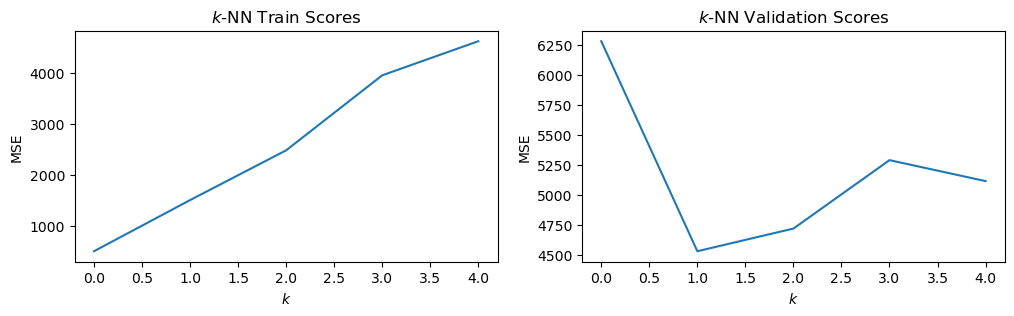

In [55]:
fig, axs = plt.subplots(1,2, figsize=(12,3))
axs[0].plot(train_scores)
axs[0].set_title(r'$k$-NN Train Scores')
axs[1].plot(val_scores, label='val')
axs[1].set_title(r'$k$-NN Validation Scores')
for ax in axs:
    ax.set_xlabel(r'$k$')
    ax.set_ylabel('MSE')

**🤔 Q: List at least _4 issues_ with this pair of plots** 

We can do better!

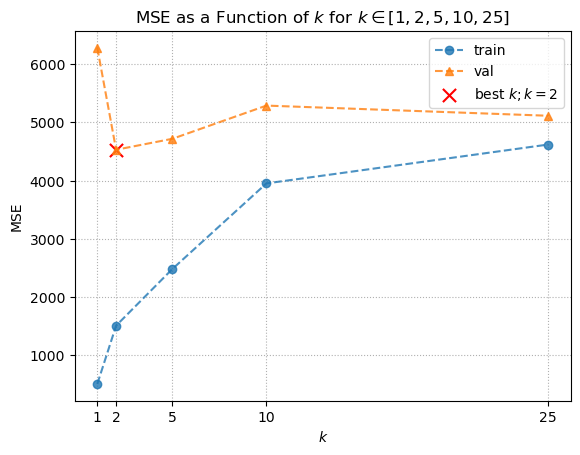

In [57]:
# A better plot
plt.plot(ks, train_scores, 'o--', alpha=0.8, label='train')
plt.plot(ks, val_scores, '^--', alpha=0.8, label='val')
plt.title(f'MSE as a Function of $k$ for $k \\in {ks}$')
plt.xlabel(r'$k$')
plt.ylabel('MSE')
plt.xticks(ks)
plt.scatter(best_k := ks[np.argmin(val_scores)], min(val_scores),
            marker='x', c='r', s=90, label=f'best $k; k = {best_k}$')
plt.grid(ls=':')
plt.legend();

In [58]:
best_k = ks[np.argmin(val_scores)]
model = KNeighborsRegressor(best_k).fit(x_train, y_train)
print(f'Best k: {best_k}')

Best k: 2


Now let's look at a prediction plot that was very common in HW2.

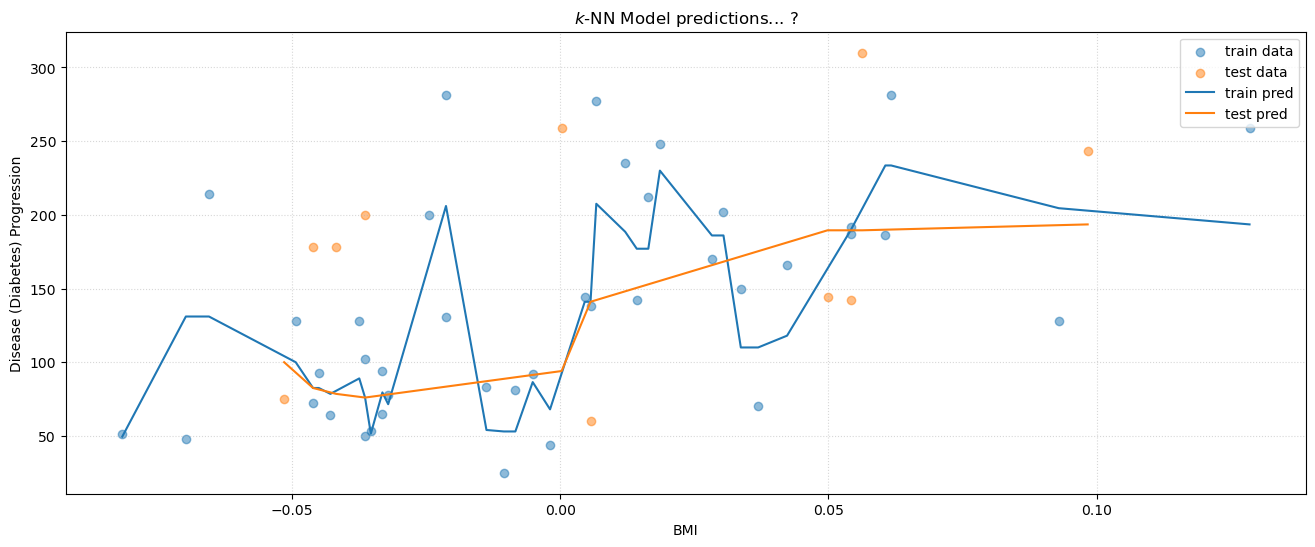

In [60]:
y_train_pred = model.predict(x_train.sort_values(by=x_train.columns[0]))
y_test_pred = model.predict(x_test.sort_values(by=x_test.columns[0]))

plt.figure(figsize=(16,6));
plt.scatter(x_train, y_train, alpha=0.5, label='train data')
plt.scatter(x_test, y_test, alpha=0.5, label='test data')
plt.plot(sorted(x_train.values), y_train_pred, label='train pred')
plt.plot(sorted(x_test.values), y_test_pred, label='test pred')
plt.title(r'$k$-NN Model predictions... ?')
plt.xlabel('BMI')
plt.ylabel('Disease (Diabetes) Progression')
plt.grid(ls=':', alpha=0.5)
plt.legend();

**🤔 Q: What are _2 major problems_ with this plot** 

**🤔 Q: What is the purpose of a 'prediction plot' for a model?** 

Here is what you should expect a $k$-NN prediction plot to look like.

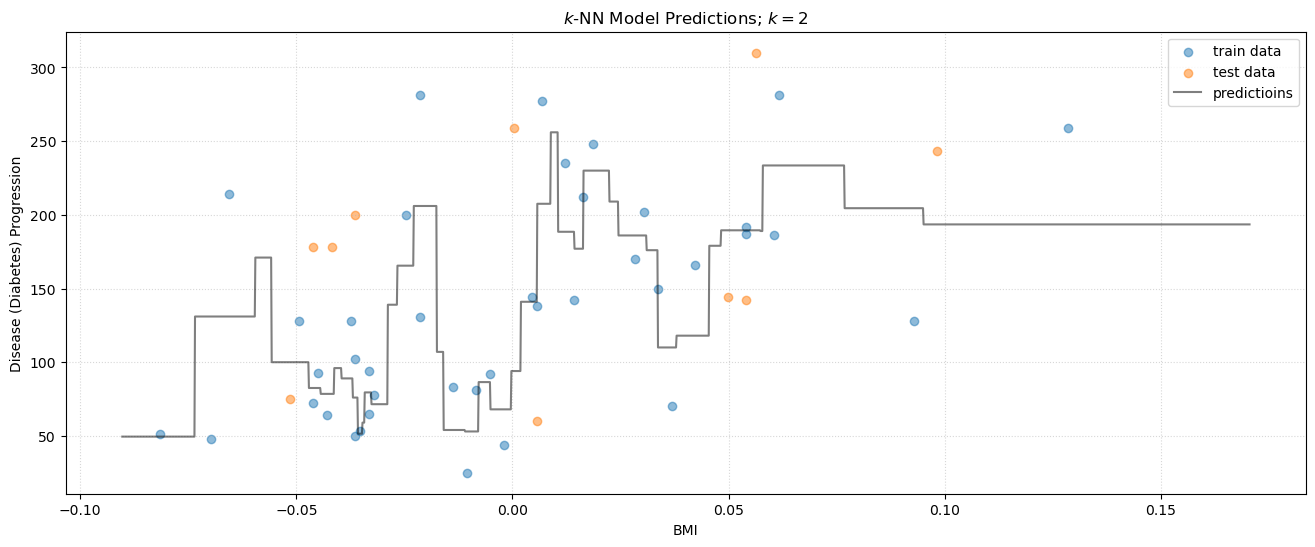

In [62]:
# A better plot
x_lin = np.linspace(X['bmi'].min(), X['bmi'].max(), 2000).reshape(-1, 1)
x_lin = pd.DataFrame(x_lin, columns=['bmi'])
# no more sorting required as x_lin is created in order!
y_pred = model.predict(x_lin)
plt.figure(figsize=(16,6));
plt.scatter(x_train, y_train, alpha=0.5, label='train data')
plt.scatter(x_test, y_test, alpha=0.5, label='test data')
plt.plot(x_lin, y_pred, c='k', alpha=0.5, label='predictioins')
plt.title(f'$k$-NN Model Predictions; $k = {best_k}$')
plt.xlabel('BMI')
plt.ylabel('Disease (Diabetes) Progression')
plt.grid(ls=':', alpha=0.5)
plt.legend();

## Wine Dataset 🍷

For the next example we'll use the **wines** dataset. Each row contains information about the objective chemical properties of the wine as well as a concensus quality rating.

In [63]:
wines = pd.read_csv('data/wines.csv', index_col=0)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,1
1,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5,1
2,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,1
3,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,1
4,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5,1


## Comparing Distributions

**Suppose you ask someone, "investivate the distribution of alcohol content in wines of each quality rating," and they produce this plot.**

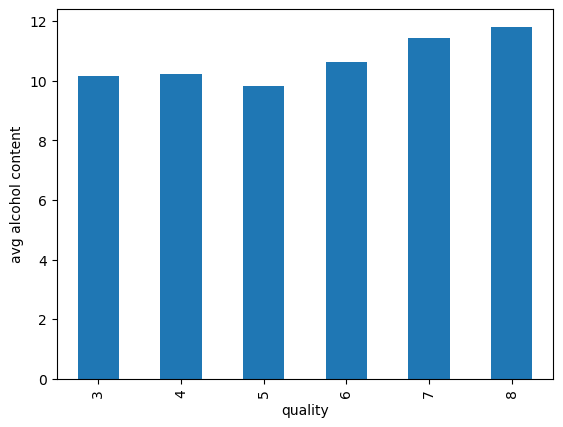

In [64]:
ax = wines.groupby('quality').agg({'alcohol': 'mean'}).plot.bar(legend=False)
ax.set_ylabel('avg alcohol content');

**🤔 Q: List at least _3 problems_ with this plot (aside from the rotated x ticks!).** 

**Answer:**
1. There's no title!
2. Differences on the $y$-axis are very slight. It makes it rather hard to read and it seems there is a lot of wasted space.
2. Looking at the means alone does not give us much information about the overall distributions!

`seaborn` allows us to produce a very similar plot with some stdev bars and colors (where this is an improvement is debateable). But many of the same issues remain.

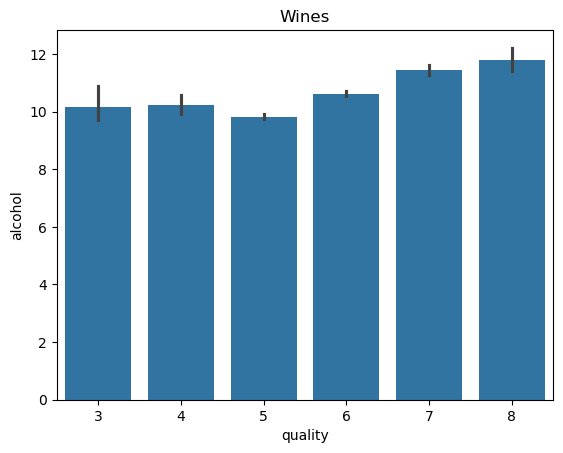

In [65]:
ax = sns.barplot(data=wines, x='quality', y='alcohol', estimator=np.mean)
ax.set_title('Wines');

Ideally, we want to display more information about these distributions then just their mean.\
There are several options. Histograms (which `seaborn` calls [histplots](https://seaborn.pydata.org/generated/seaborn.histplot.html)) make a very good default/first choice for EDA. 

But trying to plot too many distributions on top of one another will result in an incomprehensible mess. Grouping categories or ploting only a subset can make all the difference between an informative visualization and a useless one.

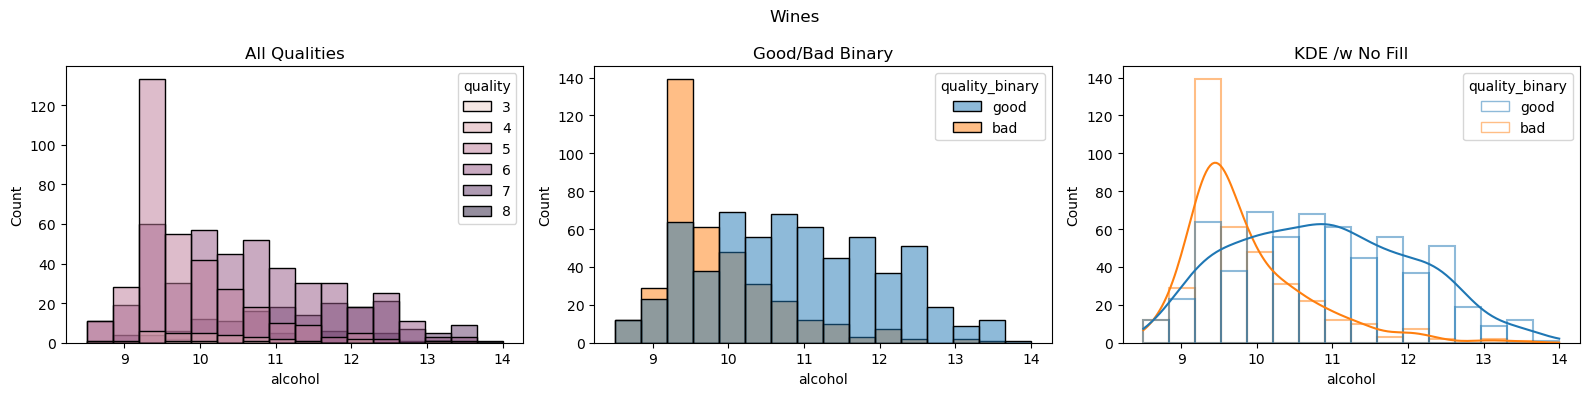

In [66]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
sns.histplot(data=wines, x='alcohol', hue='quality', alpha=0.5, ax=axs[0]).set_title('All Qualities')
wines_binary = wines.copy()
wines_binary['quality_binary'] = np.where(wines_binary.quality > 5, 'good', 'bad')
sns.histplot(data=wines_binary, x='alcohol', hue='quality_binary', alpha=0.5, ax=axs[1]).set_title('Good/Bad Binary')
sns.histplot(data=wines_binary, x='alcohol', hue='quality_binary', 
             kde=True, alpha=0.5, fill=False, ax=axs[2]).set_title('KDE /w No Fill')
plt.suptitle('Wines')
plt.tight_layout();

If you are intent on comparing more than 2 or 3 distributions then [boxplot]() would probably the next thing to try. Another benefit they have overhistograms is the ability to clearly display outliers (or 'fliers'). But displaying outliers can squash the distributions. So it is important to know how to toggle them off when we need to.

In [68]:
# create an extreme outlier as a demonstration
new_obs = wines.iloc[-1].copy()
new_obs['alcohol'] += 5
wines_outlier = pd.concat([wines.copy(), pd.DataFrame([new_obs])], ignore_index=True)
# for some reason the above steps changed `quality` to a float
wines_outlier['quality'] = wines_outlier.quality.astype(int)

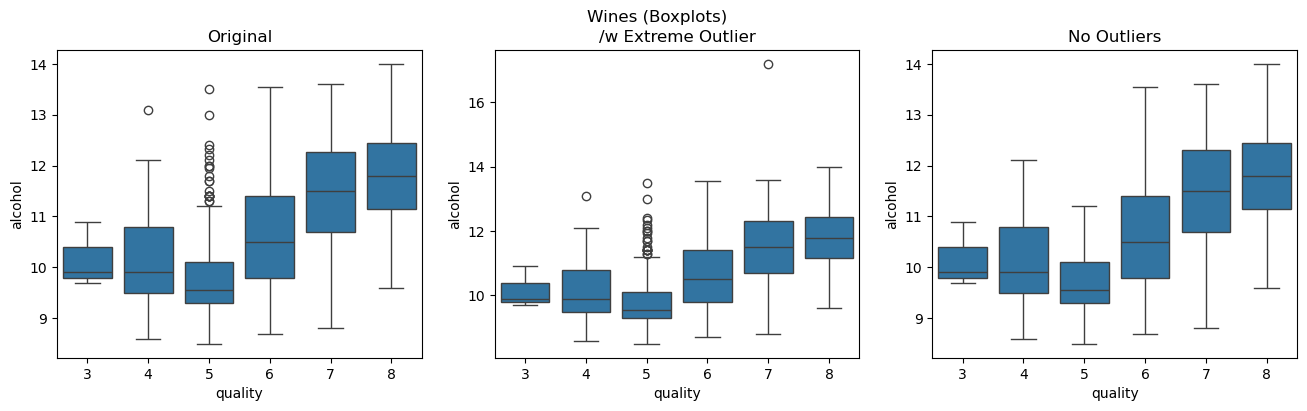

In [69]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
sns.boxplot(data=wines, x='quality', y='alcohol', ax=axs[0]).set_title('Original')
sns.boxplot(data=wines_outlier, x='quality', y='alcohol', ax=axs[1]).set_title('/w Extreme Outlier')
sns.boxplot(data=wines_outlier, x='quality', y='alcohol', showfliers=False, ax=axs[2]).set_title('No Outliers')
plt.suptitle('Wines (Boxplots)');

A related issue to the distribution squashing effect of the extreme outlier above: be careful about plotting on a **log scale**. It is not always warrented and can also flatten what might otherwise be obvious differences between distributions.

The [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) is a nice alternative to the box plot that provides a bit more information about the other quantiles. The [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) is like a mix between a scatter plot and a violin plot.

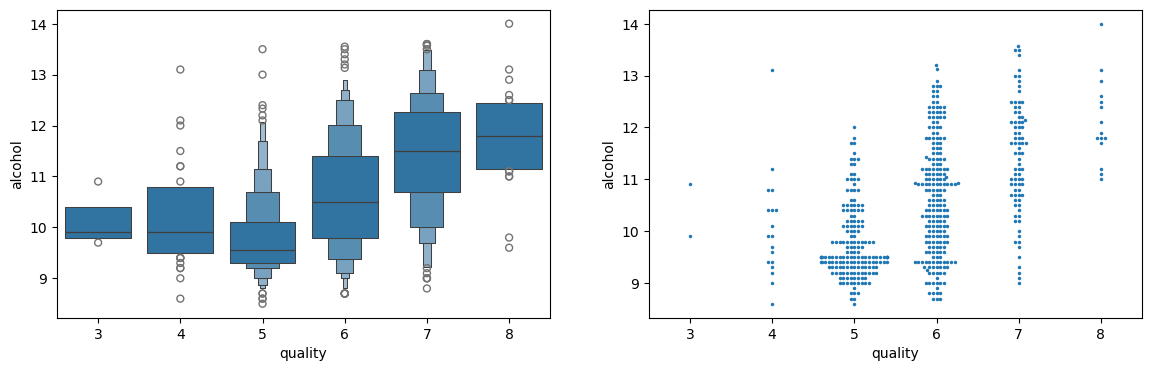

In [70]:
fig, axs = plt.subplots(1,2, figsize=(14,4))
sns.boxenplot(data=wines, x='quality', y='alcohol', ax=axs[0]);
sns.swarmplot(data=wines.sample(frac=.5), x='quality', y='alcohol', ax=axs[1], s=2.5);

`swarmplot` can be finicky. It will throw warnings and only plot a subset of the data if there isn't enough space. I've taken a sample here and decreased the marker size to avoid the warning.

**Q:** 🤔 If we wanted to be careful, what should we ensure about the sample we are plotting?

[stripplot]() is a nice alternative to `swarmplot` that won't complain about the number of points. [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) is similar but has the quirk of being a 'figure-level' function. And so does not accept target axes as arguments.

The violinplot is another popular choice.

In our example, the numerical value of `quantity` is easily interpreted by the plot. But for many non-ordinal categorical variables that have been numerically encoded this is not the case (think of the dietary restrictions or cities in HW2). In these cases we always want to change the labels for the categories into something that the viewer can interpret directly. To demonstrate this we've made some string labels for each category and added them to the plot using `ax.set_ticklabels()` .

/var/folders/lr/pwk4bd7d37zchw5p88vwksrc0000gn/T/ipykernel_37545/2592795969.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=quality_names)


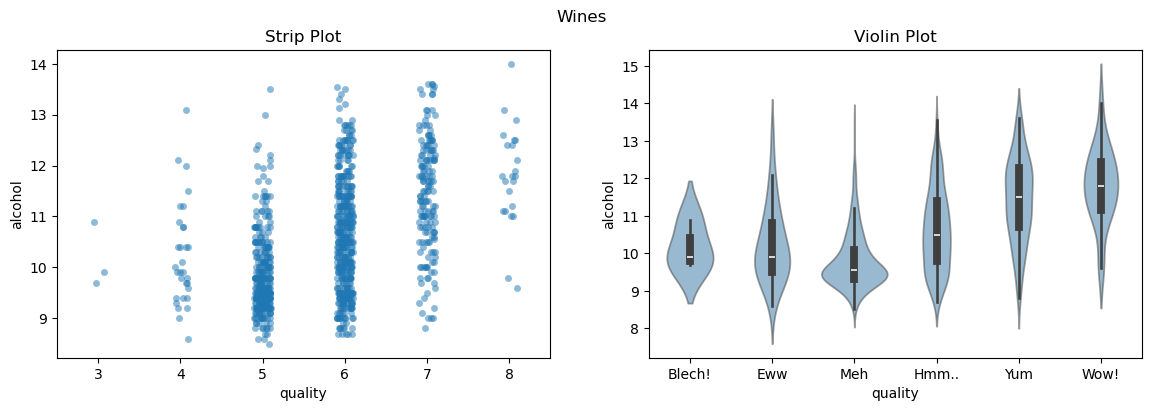

In [71]:
quality_names = ['Blech!', 'Eww', 'Meh', 'Hmm..', 'Yum', 'Wow!'] 
fig, axs = plt.subplots(1,2, figsize=(14,4))
sns.stripplot(data=wines, x='quality', y='alcohol', alpha=0.5, ax=axs[0]).set_title('Strip Plot')
ax = sns.violinplot(data=wines, x='quality', y='alcohol', alpha=0.5, ax=axs[1])
ax.set_xticklabels(labels=quality_names)
ax.set_title('Violin Plot')
plt.suptitle('Wines');

## Bootstrap Intervals

Generating and plotting bootstrap intervals (either for loss or predictions) have caused people some difficuly. So let's look at an example.

Wine quality takes on 6 descrete values, 3-8.

In [72]:
sorted(wines.quality.unique())

[3, 4, 5, 6, 7, 8]

Let's build several candidate **regularized, polynomial regression models** to predict quality from `alcohol`.\
We'll try several different degrees using multiple bootstraps on each and look at the distribution of our models' train MSE across the different degrees.
* In the future we might treat this as a _classification_ rather than a regression problem, but we learn that next week 😉
* Because we are really only concerned with the bootstrap visualization here, there is no test set in this example

Separate predictor and response.

In [73]:
response = 'quality'
X = wines[['alcohol']]
y = wines[response]

**Q:** 🤔 How should I set `PolyFeature`'s `include_bias` and my model's `fit_intercept` parameter when using regularization? Does it matter?

In [74]:
max_degree = 5
X_scaled = StandardScaler().fit_transform(X)
X_poly = PolynomialFeatures(degree=max_degree, include_bias=False).fit_transform(X_scaled)
X_poly.shape

(1000, 5)

We will store our train scores in a matrix of shape $(b,d)$ where $b$ is the number of bootstrap for each degree and $d$ is the number of degrees we are trying.

In [75]:
# initialize matrix of zeros
n_boot = 10
scores = np.zeros((n_boot, max_degree))
scores.shape

(10, 5)

We 'fill in' our scores matrix using the $i$, and $j$ indices of the nested loop to index into the matrix.

**An aside about [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)**

In [76]:
for i in range(n_boot):
    idx = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
    for j, d in enumerate(range(1, max_degree+1)):
        model = LassoCV(cv=5, max_iter=20000).fit(X_poly[idx,:d], y[idx])
        scores[i,j] = (model.score(X_poly[:,:d], y)) 

We can then take the mean and stdev across the bootstrap axis to get our values for plotting the loss distributions for each degree.

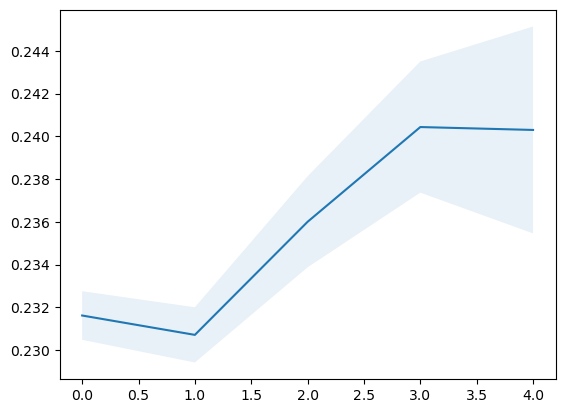

In [77]:
mse_means = scores.mean(axis=0)
mse_stdevs = scores.std(axis=0)
plt.plot(mse_means)
plt.fill_between(np.arange(max_degree), mse_means+mse_stdevs, mse_means-mse_stdevs, alpha=.1);

Well, that plot does give us the general idea of what is going on. But it is not fit for public consumption.
Let's work together to make it better one component at a time.

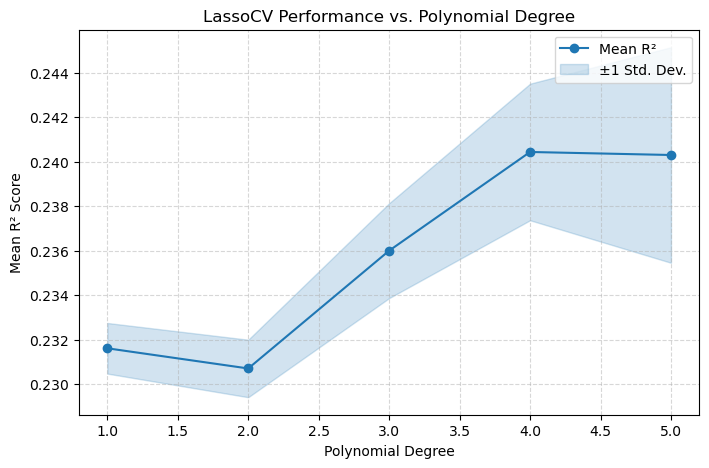

In [113]:
# improve the bootstrap interval plot
# our code here
degrees = np.arange(1, max_degree + 1)

plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_means, marker='o', color='tab:blue', label="Mean R²")
plt.fill_between(degrees,
                 mse_means + mse_stdevs,
                 mse_means - mse_stdevs,
                 color='tab:blue',
                 alpha=0.2,
                 label="±1 Std. Dev.")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean R² Score")
plt.title("LassoCV Performance vs. Polynomial Degree")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


## PCA Redux 🪃

Let's quickly revisit PCA.\
This gives us an opportunity to talk about some of the common visualizations we perform whening using PCA ss well an all too common mistake that is made when approaching PCA and interpreting its results.

PCA can be used to explore the general _structure_ of a dataset.\
We might wonder if the other features in the wine dataset are actually useful for distinguishing good wines for bad as determined by the `quality` feature.\ 
To simplify things, we will convert the `quality` feature to a binary good/bad value.

In [79]:
wines['good'] = 1*(wines.quality > 5)

Separate what would be the response were we to model (`quality`) from the other features.

In [80]:
wines = wines.drop('quality', axis=1)
response = 'good'
X = wines.drop(response, axis=1)
y = wines[response]

Make sure you scale before performing PCA!

In [81]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaled)

`matplotlib` allows you to plot a line with just a single 1-D array as an argument.\
The array elements are used as the $y$-values and the indices are used as the $x$-values.\
This very convenient! But why might this cause problems with the interpretability of our plot below?

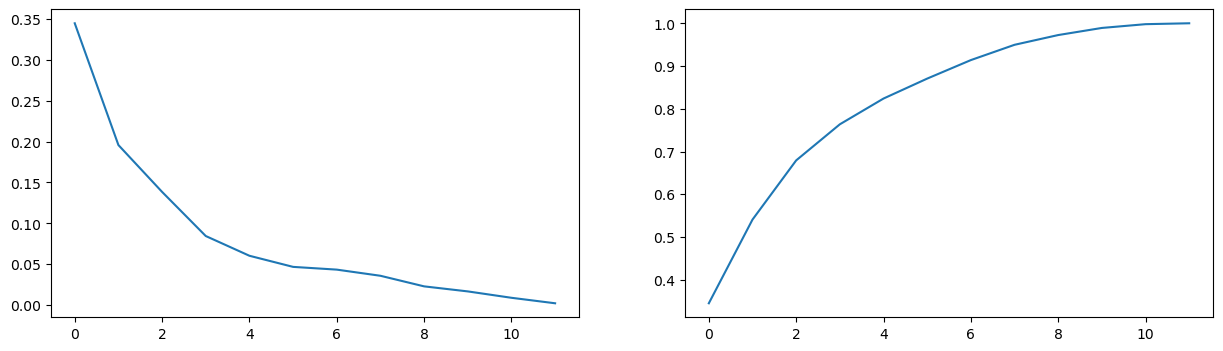

In [82]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(pca.explained_variance_ratio_)
axs[1].plot(np.cumsum(pca.explained_variance_ratio_));

The above might be acceptable for your own personal use as a quick glimpse into what is going on with the components. But if the plot is going to be seen by anyone other than yourself you really owe it to them to make it as clear and informative as possible.

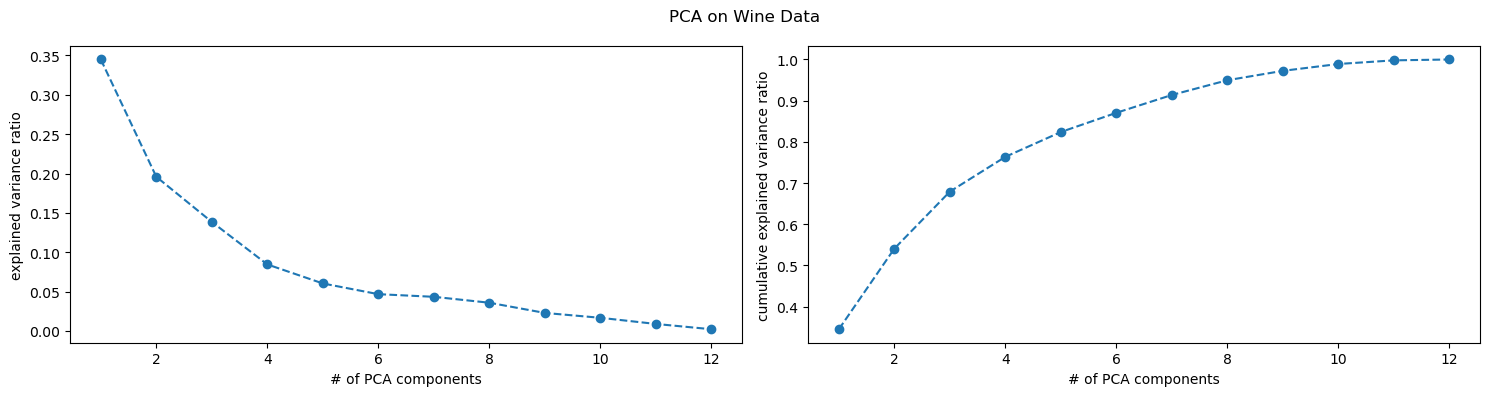

In [83]:
# This is perhaps an example of over-engineering the plotting process
fig, axs = plt.subplots(1,2, figsize=(15,4))
data = {'explained variance ratio': (var_rat := pca.explained_variance_ratio_),
        'cumulative explained variance ratio': np.cumsum(var_rat)}
xs = np.arange(1, len(var_rat)+1)
for ax, (name, var) in zip(axs, data.items()):
    ax.plot(xs, var, marker='o', ls='--')
    ax.set_xlabel('# of PCA components')
    ax.set_ylabel(name)
fig.suptitle('PCA on Wine Data', ha='center')
plt.tight_layout()

**Q:** 🤔 What insights from this plot might have a bearing on our plan to investivation the data's structure through visualization?

Transform the data into the PCA space.

In [84]:
X_PCA = PCA(n_components=2).fit_transform(X_scaled)
X_PCA.shape

(1000, 2)

And plotting the data against the first two components we see two distinct clusters.\
Aha! These must be our good and bad wines, right?

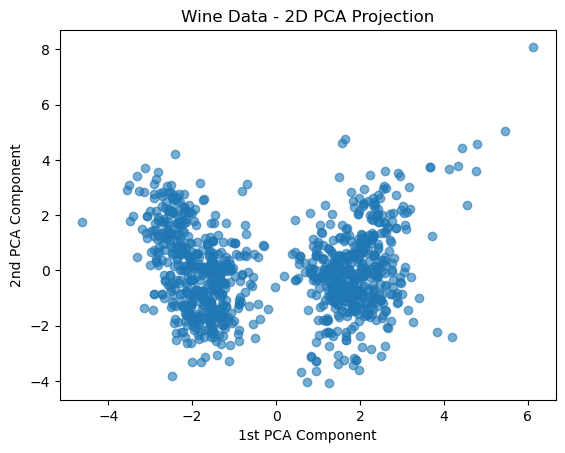

In [85]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha=0.6)
plt.title('Wine Data - 2D PCA Projection')
plt.xlabel('1st PCA Component')
plt.ylabel('2nd PCA Component');

We can check this assumptions by coloring the points based on the binary `quality` feature.\
But uh oh!  There doesn't seem to be much rhyme or reason to the position of the good vs bad wines in the PCA space!\
What is in fact happening?

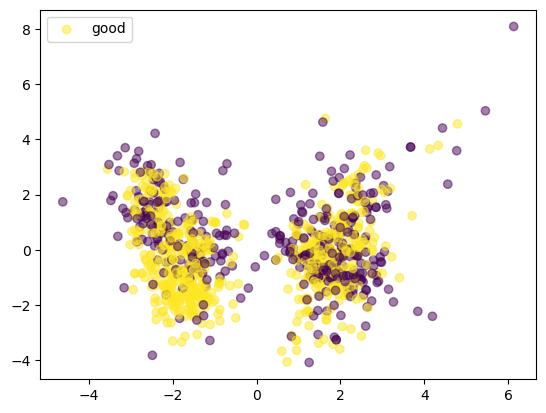

In [86]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha=0.5, c=y, label=response)
plt.legend();

**Q:** 🤔 Any idea what might be going on here?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,quality_cat
0,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,1,medium
1,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5,1,medium
2,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,1,medium
3,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,1,medium
4,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5,1,medium


PCA shape: (1000, 3)


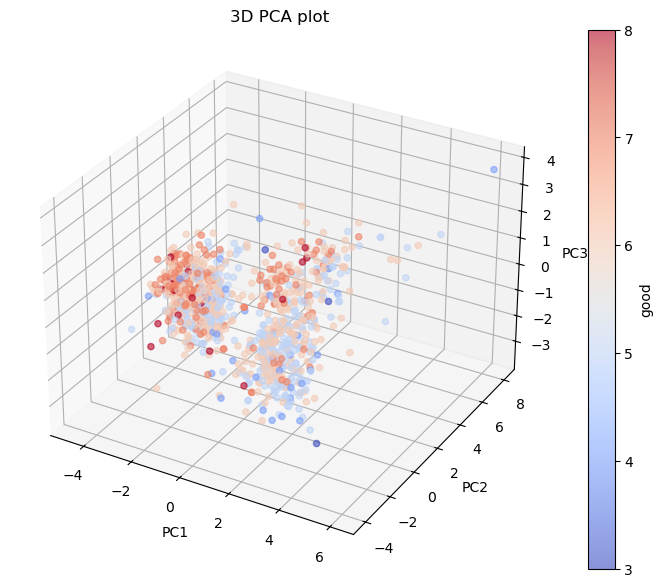

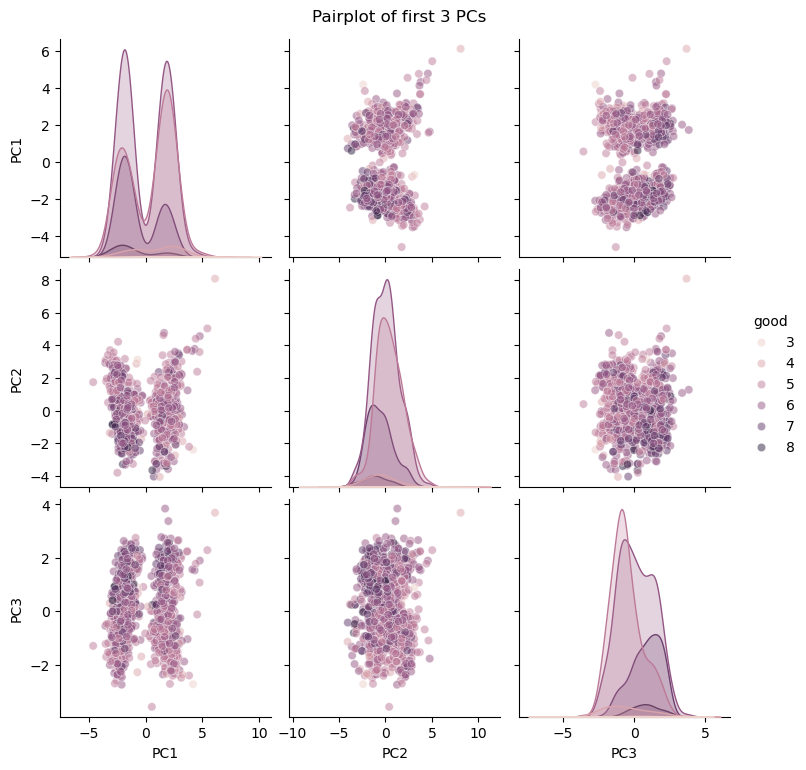

In [111]:
# investivate with another plot
# your code here
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

wines = pd.read_csv('data/wines.csv', index_col=0)
bins = [0, 5, 7, np.inf]  # quality ranges
labels = ['bad', 'medium', 'good']

wines['quality_cat'] = pd.cut(wines['quality'], bins=bins, labels=labels, right=False)
display(wines.head())

X_PCA = PCA(n_components=3).fit_transform(X_scaled)
print(f"PCA shape: {X_PCA.shape}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2],
                c=wines.quality, cmap='coolwarm', alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(sc, label=response)
plt.title("3D PCA plot")
plt.show()

# 2️⃣ Pairplot for all combinations
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3'])
df_pca[response] = wines.quality
sns.pairplot(df_pca, hue=response, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of first 3 PCs", y=1.02)
plt.show()

Which predictors does PCA think are most important?\
We can look at the component 'loadings' (discussion [here](https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn)).

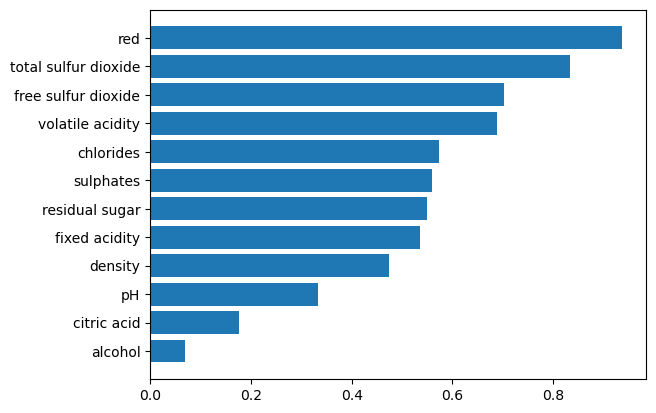

In [93]:
loadings = (pca.components_.T * np.sqrt(pca.explained_variance_))[:,0]
idx = np.argsort(np.abs(loadings))
# we aren't concerned with the sign so we take the absolute value
plt.barh(np.arange(12), np.abs(loadings[idx]));
plt.yticks(ticks=np.arange(12), labels=X.columns[idx]);

Recall that each PCA component is a linear combination of our original predictors.\
Simply looking at the (absolute value of) the 'weight' on each predictor in linear combination for the 1st PCA component gives us pretty much the same results. Or at least the same ordering.

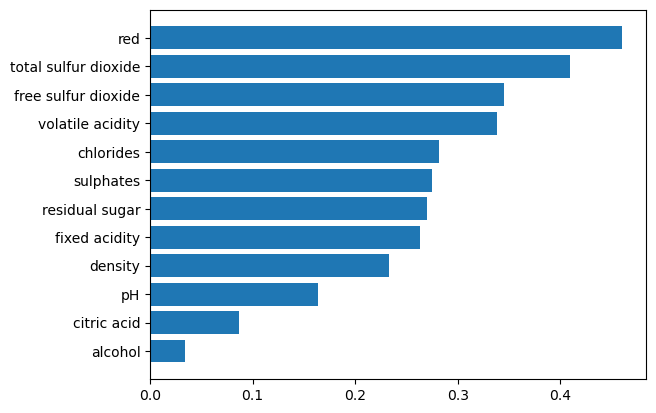

In [94]:
idx = np.argsort(np.abs(pca.components_[0]))
plt.barh(np.arange(12), np.abs(pca.components_[0])[idx]);
plt.yticks(ticks=np.arange(12), labels=X.columns[idx]);

**Fin**